In [ ]:
# EDA

In [14]:
# first it's helpful for me to get the general layout of the file 
df.shape

#There are 16K games and 16 columns describing their sales, users, and critics

(16719, 16)

In [16]:
# next i want to see what those columns are and their data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [18]:
# we have some sales data that could be fun to play with - already thinking of some vizs we can use - still getting to know the file
df.describe()

# there are some nulls in year of release, critic score, critic count, and user count - will want to be conscious of that when aggregating data. it may be useful when analyzing those critic and usr counts to remove the nulls 

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [20]:
# lets count nulls!
df.isnull().sum()
 
# for year of release if this was a project we might go through and try to populate the missing rows. i may drop them later on to keep the data clean 
# Handling NaN in 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count':
# For now, leaving NaN values in the dataset as most tools exclude them automatically in calculations and visualizations.
# Only numeric values will be used for analysis and plotting.
# If needed for modeling or deeper insights, consider imputing with mean/median or removing rows with NaN.


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [22]:
# lets check for unique values across all columns 

df.nunique()

# this datset covers ~12k unique games across 31 platforms/ gaming systems, 12 genres  581 publishers and 1.6K developpers over 39 years - this should make for robust analysis! 
# considering there's 16.7k rows in the dataframe  im wondering why the names wouldnt be unique - maybe because the same game has been released in multiple years? let's sort the names 

Name               11562
Platform              31
Year_of_Release       39
Genre                 12
Publisher            581
NA_Sales             402
EU_Sales             307
JP_Sales             244
Other_Sales          155
Global_Sales         629
Critic_Score          82
Critic_Count         106
User_Score            96
User_Count           888
Developer           1696
Rating                 8
dtype: int64

In [24]:
df.sort_values(by = 'Name', ascending = True).head(20)

# after sorting by name title, I see that there are duplicates in the name column because the same game is released on different platforms
# for example, here I'm seeing for example Frozen: Olaf's Quest has been released on DS and 3DS in 2013

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
14985,Beyblade Burst,3DS,2016.0,Role-Playing,FuRyu,0.00,0.00,0.03,0.00,0.03,NaN,NaN,NaN,NaN,NaN,NaN
1079,Fire Emblem Fates,3DS,2015.0,Role-Playing,Nintendo,0.81,0.23,0.52,0.11,1.68,NaN,NaN,NaN,NaN,NaN,NaN
3862,Frozen: Olaf's Quest,DS,2013.0,Platform,Disney Interactive Studios,0.21,0.26,0.00,0.04,0.52,NaN,NaN,NaN,NaN,NaN,NaN
3358,Frozen: Olaf's Quest,3DS,2013.0,Platform,Disney Interactive Studios,0.27,0.27,0.00,0.05,0.60,NaN,NaN,NaN,NaN,NaN,NaN
13795,Haikyu!! Cross Team Match!,3DS,2016.0,Adventure,Namco Bandai Games,0.00,0.00,0.04,0.00,0.04,NaN,NaN,NaN,NaN,NaN,NaN
2454,Tales of Xillia 2,PS3,2012.0,Role-Playing,Namco Bandai Games,0.20,0.12,0.45,0.07,0.84,71.0,59.0,7.9,216.0,Bandai Namco Games,T
4728,'98 Koshien,PS,1998.0,Sports,Magical Company,0.15,0.10,0.12,0.03,0.41,NaN,NaN,NaN,NaN,NaN,NaN
8343,.hack//G.U. Vol.1//Rebirth,PS2,2006.0,Role-Playing,Namco Bandai Games,0.00,0.00,0.17,0.00,0.17,NaN,NaN,NaN,NaN,NaN,NaN
7088,.hack//G.U. Vol.2//Reminisce,PS2,2006.0,Role-Playing,Namco Bandai Games,0.11,0.09,0.00,0.03,0.23,NaN,NaN,NaN,NaN,NaN,NaN
8598,.hack//G.U. Vol.2//Reminisce (jp sales),PS2,2006.0,Role-Playing,Namco Bandai Games,0.00,0.00,0.16,0.00,0.16,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# let's see a unique list of the 39 platforms out of curiosity 

unique_platforms = df['Platform'].unique()
print(unique_platforms)

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


In [ ]:
# DATA CLEANING

In [11]:
# it may be helpful to add a column with unabbreviated names for easy readbability 

# first create a dictionary assigning the legacy platform abbreviations to full names
platform_mapping = {
    'Wii': 'Nintendo Wii',
    'NES': 'Nintendo Entertainment System',
    'GB': 'Game Boy',
    'DS': 'Nintendo DS',
    'X360': 'Xbox 360',
    'PS3': 'PlayStation 3',
    'PS2': 'PlayStation 2',
    'SNES': 'Super Nintendo Entertainment System',
    'GBA': 'Game Boy Advance',
    'PS4': 'PlayStation 4',
    '3DS': 'Nintendo 3DS',
    'N64': 'Nintendo 64',
    'PS': 'PlayStation',
    'XB': 'Xbox',
    'PC': 'Personal Computer',
    '2600': 'Atari 2600',
    'PSP': 'PlayStation Portable',
    'XOne': 'Xbox One',
    'WiiU': 'Nintendo Wii U',
    'GC': 'Nintendo GameCube',
    'GEN': 'Sega Genesis',
    'DC': 'Sega Dreamcast',
    'PSV': 'PlayStation Vita',
    'SAT': 'Sega Saturn',
    'SCD': 'Sega CD',
    'WS': 'WonderSwan',
    'NG': 'Neo Geo',
    'TG16': 'TurboGrafx-16',
    '3DO': '3DO Interactive Multiplayer',
    'GG': 'Sega Game Gear',
    'PCFX': 'PC-FX'
}

# next use the .map() function to create a new column in df mapping the old names to new ones
df['Platforms_Clean'] = df['Platform'].map(platform_mapping)

# the result
df


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Platforms_Clean
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E,Nintendo Wii
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN,Nintendo Entertainment System
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,Nintendo Wii
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E,Nintendo Wii
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN,Game Boy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,PlayStation 3
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,Xbox 360
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,PlayStation Vita
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,Game Boy Advance


In [13]:
# moving platforms_clean closer to the platform column

column_to_move = df.pop('Platforms_Clean')
df.insert(2, 'Platforms_Clean', column_to_move)

df

,Name,Platform,Platforms_Clean,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,Nintendo Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,Nintendo Entertainment System,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,Nintendo Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,Nintendo Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,Game Boy,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,PlayStation 3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,Xbox 360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,PlayStation Vita,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,Game Boy Advance,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# it would be helpful to move all game baseline data including developer and rating ahead too

column_to_move2 = df.pop('Developer')
df.insert(3, 'Developer', column_to_move2)

column_to_move3 = df.pop('Rating')
df.insert(4, 'Rating', column_to_move3)

df

,Name,Platform,Platforms_Clean,Developer,Rating,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
0,Wii Sports,Wii,Nintendo Wii,Nintendo,E,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0
1,Super Mario Bros.,NES,Nintendo Entertainment System,NaN,NaN,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,Nintendo Wii,Nintendo,E,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0
3,Wii Sports Resort,Wii,Nintendo Wii,Nintendo,E,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0
4,Pokemon Red/Pokemon Blue,GB,Game Boy,NaN,NaN,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,PlayStation 3,NaN,NaN,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,Xbox 360,NaN,NaN,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,PlayStation Vita,NaN,NaN,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,Game Boy Advance,NaN,NaN,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN


In [97]:
# i am seeing the year of release has a .0 after it - it should be an integer not a float - let's clean that 

df['Year_of_Release'] = df['Year_of_Release'].astype('Int64')
df

,Name,Platform,Platforms_Clean,Developer,Rating,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
0,Wii Sports,Wii,Nintendo Wii,Nintendo,E,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.00
1,Super Mario Bros.,NES,Nintendo Entertainment System,NaN,NaN,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,nan
2,Mario Kart Wii,Wii,Nintendo Wii,Nintendo,E,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.00
3,Wii Sports Resort,Wii,Nintendo Wii,Nintendo,E,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.00
4,Pokemon Red/Pokemon Blue,GB,Game Boy,NaN,NaN,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,PlayStation 3,NaN,NaN,2016,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,nan
16715,LMA Manager 2007,X360,Xbox 360,NaN,NaN,2006,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,nan
16716,Haitaka no Psychedelica,PSV,PlayStation Vita,NaN,NaN,2016,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,nan
16717,Spirits & Spells,GBA,Game Boy Advance,NaN,NaN,2003,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,nan


In [69]:
# Exploring the sales (volume) data

df['NA_Sales'].unique()
df['EU_Sales'].unique()
df['JP_Sales'].unique()
df['Other_Sales'].unique()
df['Global_Sales'].unique()

# These values are expressed in scientific notation - may be helpful to display them without, assuming this is sales in millions

array([8.253e+01, 4.024e+01, 3.552e+01, 3.277e+01, 3.137e+01, 3.026e+01,
       2.980e+01, 2.892e+01, 2.832e+01, 2.831e+01, 2.467e+01, 2.321e+01,
       2.310e+01, 2.270e+01, 2.181e+01, 2.179e+01, 2.104e+01, 2.081e+01,
       2.061e+01, 2.015e+01, 1.825e+01, 1.814e+01, 1.728e+01, 1.627e+01,
       1.615e+01, 1.585e+01, 1.529e+01, 1.514e+01, 1.498e+01, 1.473e+01,
       1.464e+01, 1.463e+01, 1.461e+01, 1.460e+01, 1.379e+01, 1.367e+01,
       1.347e+01, 1.332e+01, 1.310e+01, 1.284e+01, 1.266e+01, 1.263e+01,
       1.261e+01, 1.213e+01, 1.212e+01, 1.189e+01, 1.177e+01, 1.168e+01,
       1.166e+01, 1.135e+01, 1.118e+01, 1.101e+01, 1.095e+01, 1.081e+01,
       1.070e+01, 1.060e+01, 1.055e+01, 1.050e+01, 1.049e+01, 1.030e+01,
       1.025e+01, 1.012e+01, 9.900e+00, 9.870e+00, 9.860e+00, 9.720e+00,
       9.710e+00, 9.490e+00, 9.440e+00, 9.360e+00, 9.310e+00, 9.300e+00,
       9.180e+00, 9.160e+00, 8.910e+00, 8.790e+00, 8.760e+00, 8.570e+00,
       8.490e+00, 8.380e+00, 8.270e+00, 8.160e+00, 

In [36]:
# grabbing a list of the columns
df.columns

Index(['Name', 'Platform', 'Platforms_Clean', 'Developer', 'Rating',
       'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales',
       'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count'],
      dtype='object')

In [ ]:
# explore critic data 
df['Critic_Score'].unique()

# these values are displayed as a float when they should be an integer

In [73]:
df['Critic_Count'].unique()

array([ 51.,  nan,  73.,  65.,  41.,  80.,  64.,  63.,  45.,  33.,  50.,
        58.,  62.,  37.,  54.,  81.,  89.,  21., 100.,  39.,  56.,  66.,
        57.,  86.,  74.,  16.,  82.,  67.,  29.,  15.,  70.,  99.,  20.,
        87.,  23.,  24.,  10.,  27.,  42.,  91.,  53.,  75.,  46.,  84.,
        38.,  12.,  90.,  97.,  44., 105.,  77.,  68.,  28.,  94.,  96.,
        61.,  22.,  88.,  47.,  98.,  85.,  13.,   8.,  95.,  17.,  35.,
        19.,  48.,  14., 113.,  83.,  72.,  30.,  69.,  76.,  18.,  34.,
        40., 101.,   9.,  32.,  78.,  36.,  25.,  59.,  31.,  79.,  26.,
        49.,  60.,  11.,  43., 107.,   7.,  71.,  55.,  52.,  92.,   4.,
        93.,   5.,   6., 103., 102., 106.,   3., 104.])

In [74]:
df['User_Count'].unique()

# converting user counts out of scientific notation would be helpful for consistency

array([3.2200e+02,        nan, 7.0900e+02, 1.9200e+02, 4.3100e+02,
       1.2900e+02, 5.9400e+02, 4.6400e+02, 1.4600e+02, 1.0600e+02,
       5.2000e+01, 3.9940e+03, 1.5880e+03, 5.0000e+01, 3.7110e+03,
       7.3000e+02, 1.9000e+01, 3.1400e+02, 8.7130e+03, 1.4540e+03,
       9.2200e+02, 2.2560e+03, 2.6980e+03, 5.2340e+03, 6.6400e+02,
       1.6620e+03, 6.3200e+02, 1.0940e+03, 2.8990e+03, 2.4200e+02,
       4.1000e+03, 2.7200e+02, 2.1470e+03, 2.9510e+03, 1.3800e+02,
       9.2100e+02, 1.1120e+03, 2.0730e+03, 2.8330e+03, 2.1170e+03,
       1.6000e+01, 4.2400e+02, 2.0450e+03, 1.2820e+03, 3.2600e+03,
       1.3500e+02, 2.4000e+01, 1.0470e+03, 1.3200e+03, 6.2600e+02,
       8.5000e+01, 3.5890e+03, 8.9600e+02, 1.2180e+03, 5.4000e+01,
       1.9000e+02, 3.4800e+02, 1.0560e+03, 8.8600e+02, 6.4400e+02,
       2.0300e+02, 4.5100e+02, 1.4430e+03, 3.9800e+02, 1.8540e+03,
       5.8000e+02, 2.1420e+03, 1.7100e+02, 1.1000e+02, 1.7610e+03,
       4.2280e+03, 3.6700e+02, 1.6580e+03, 4.3200e+02, 1.5990e

In [21]:
# formatting user counts in millions 

df['User_Count'] = df['User_Count'].map("{:.2f}".format)
df

,Name,Platform,Platforms_Clean,Developer,Rating,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
0,Wii Sports,Wii,Nintendo Wii,Nintendo,E,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.00
1,Super Mario Bros.,NES,Nintendo Entertainment System,NaN,NaN,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,nan
2,Mario Kart Wii,Wii,Nintendo Wii,Nintendo,E,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.00
3,Wii Sports Resort,Wii,Nintendo Wii,Nintendo,E,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.00
4,Pokemon Red/Pokemon Blue,GB,Game Boy,NaN,NaN,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,PlayStation 3,NaN,NaN,2016,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,nan
16715,LMA Manager 2007,X360,Xbox 360,NaN,NaN,2006,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,nan
16716,Haitaka no Psychedelica,PSV,PlayStation Vita,NaN,NaN,2016,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,nan
16717,Spirits & Spells,GBA,Game Boy Advance,NaN,NaN,2003,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,nan


In [40]:
# User score values

df['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [44]:
# Developper values

df['Developer'].unique()

array(['Nintendo', nan, 'Good Science Studio', ..., 'Big Red Software',
       'Atomic Games', 'Interchannel-Holon'], dtype=object)

In [46]:
# Rating values - These are difficult to understand and would be helpful to map them as well later on 

df['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [ ]:
# DATA ANALYSIS AND VISUALIZATION 

In [81]:
df

,Name,Platform,Platforms_Clean,Developer,Rating,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
0,Wii Sports,Wii,Nintendo Wii,Nintendo,E,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.00
1,Super Mario Bros.,NES,Nintendo Entertainment System,NaN,NaN,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,nan
2,Mario Kart Wii,Wii,Nintendo Wii,Nintendo,E,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.00
3,Wii Sports Resort,Wii,Nintendo Wii,Nintendo,E,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.00
4,Pokemon Red/Pokemon Blue,GB,Game Boy,NaN,NaN,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,PlayStation 3,NaN,NaN,2016,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,nan
16715,LMA Manager 2007,X360,Xbox 360,NaN,NaN,2006,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,nan
16716,Haitaka no Psychedelica,PSV,PlayStation Vita,NaN,NaN,2016,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,nan
16717,Spirits & Spells,GBA,Game Boy Advance,NaN,NaN,2003,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,nan


In [56]:
print(df.dtypes)

Name                object
Platform            object
Platforms_Clean     object
Developer           object
Rating              object
Year_of_Release      Int64
Genre               object
Publisher           object
NA_Sales            object
EU_Sales            object
JP_Sales            object
Other_Sales         object
Global_Sales        object
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
dtype: object


<Axes: xlabel='Year_of_Release'>

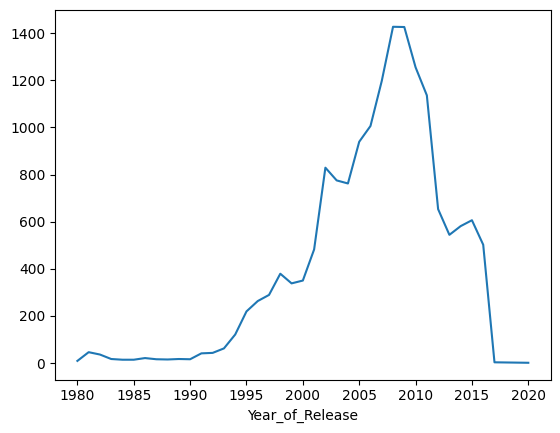

In [111]:
# using a .count and .groupby function to analyze games released per year

# Group by Year of Release and Count of Platform 
games_release = df.groupby('Year_of_Release')['Platform'].count()

#let's visualize game releases over time 
games_release.plot()

# Prior to 200, there weren't many games released - probably due to a lack of electronic evolution before that time. 
# We see a spike between 2005 and 2007 and afterward a rapid decline. 
# Focusing on this 'gaming boom' after 2000 could provide insights into the market at its healthiest

In [101]:
# filtering out all games out of the table released before 2000

df2 = df[df['Year_of_Release'] > 2000] # using df2 for filtered analysis 

df2

,Name,Platform,Platforms_Clean,Developer,Rating,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
0,Wii Sports,Wii,Nintendo Wii,Nintendo,E,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.00
2,Mario Kart Wii,Wii,Nintendo Wii,Nintendo,E,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.00
3,Wii Sports Resort,Wii,Nintendo Wii,Nintendo,E,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.00
6,New Super Mario Bros.,DS,Nintendo DS,Nintendo,E,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.00
7,Wii Play,Wii,Nintendo Wii,Nintendo,E,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,PlayStation 3,NaN,NaN,2016,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,nan
16715,LMA Manager 2007,X360,Xbox 360,NaN,NaN,2006,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,nan
16716,Haitaka no Psychedelica,PSV,PlayStation Vita,NaN,NaN,2016,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,nan
16717,Spirits & Spells,GBA,Game Boy Advance,NaN,NaN,2003,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,nan


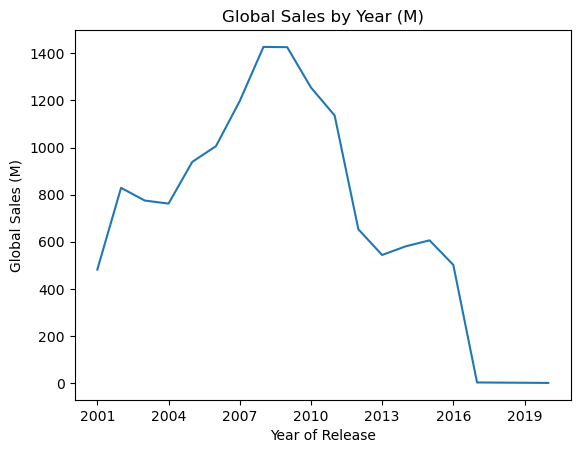

In [127]:
# plotting game releases after 2000

# Group by Year of Release and Count of Platform 
games_release = df2.groupby('Year_of_Release')['Platform'].count()

#let's visualize game releases over time 
gr = games_release.plot()
gr.set_xlabel('Year of Release')
gr.set_ylabel('Global Sales (M)')
gr.set_title('Global Sales by Year (M)')
gr.xaxis.set_major_locator(MaxNLocator(integer=True))

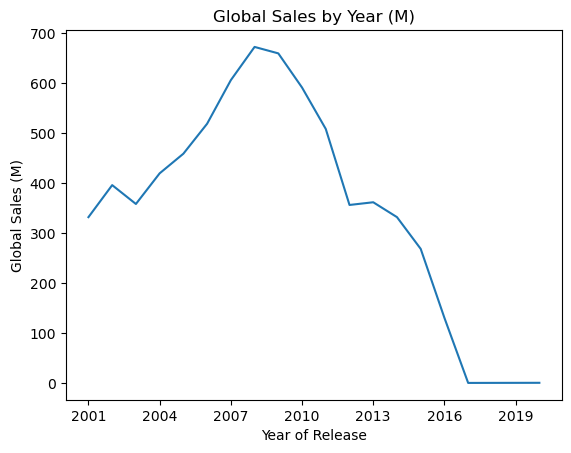

In [125]:
#importing ticker
from matplotlib.ticker import MaxNLocator

# global sales by year

global_sales = df2.groupby('Year_of_Release')['Global_Sales'].sum()

#plotting global sales 
gs = global_sales.plot()
gs.set_xlabel('Year of Release')
gs.set_ylabel('Global Sales (M)')
gs.set_title('Global Sales by Year (M)')
gs.xaxis.set_major_locator(MaxNLocator(integer=True))

# game release and sales are consistent so product release is a lever driving sales 

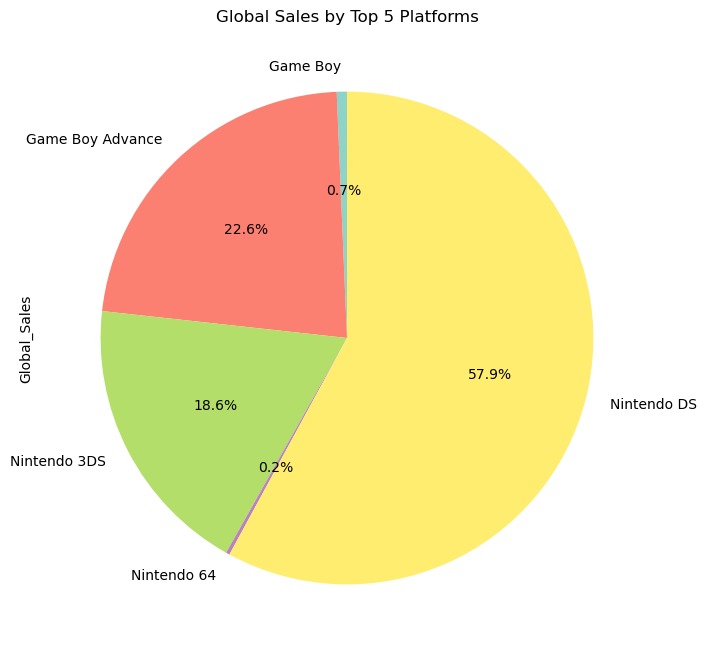

In [145]:
# plotting global sales by platform in a pie chart

globalsales_platform = df2.groupby('Platforms_Clean')['Global_Sales'].sum()
top_platforms = globalsales_platform.head(5)

tp = top_platforms

# Plotting the pie chart
plt.figure(figsize=(8, 8)) 
tp = top_platforms.plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3')

# Adding a title
plt.title('Global Sales by Top 5 Platforms')

# Displaying the pie chart
plt.show()

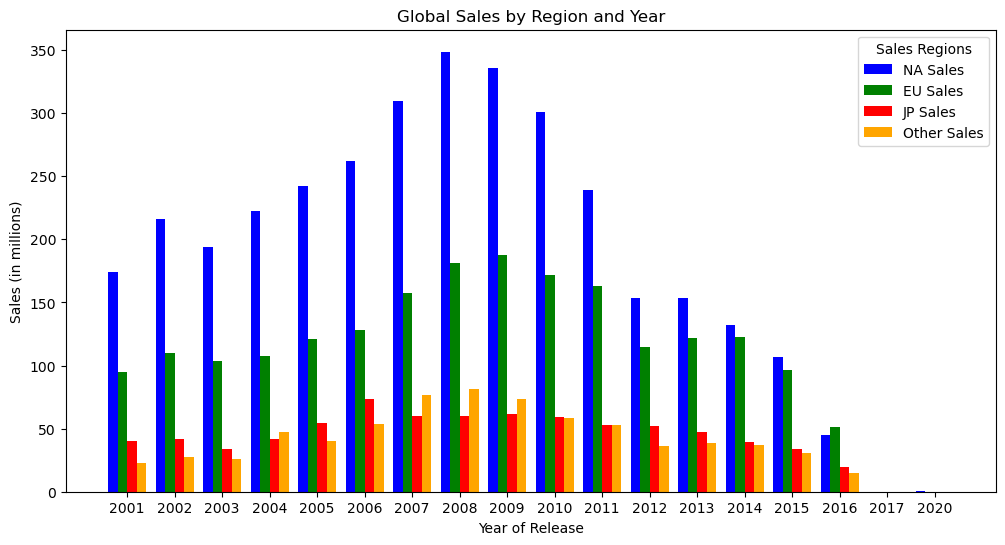

In [129]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df2' contains columns for 'Year_of_Release' and different sales data like 'NA_Sales', 'EU_Sales', 'JP_Sales', etc.
# Group by 'Year_of_Release' and sum the sales data
sales_by_region = df2.groupby('Year_of_Release')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# Define positions for the bars on the x-axis (the width of each bar is set by 'bar_width')
years = sales_by_region.index
bar_width = 0.2  # Width of each bar
index = np.arange(len(years))  # X-axis positions

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot each sales region as a separate bar
ax.bar(index, sales_by_region['NA_Sales'], bar_width, label='NA Sales', color='blue')
ax.bar(index + bar_width, sales_by_region['EU_Sales'], bar_width, label='EU Sales', color='green')
ax.bar(index + 2 * bar_width, sales_by_region['JP_Sales'], bar_width, label='JP Sales', color='red')
ax.bar(index + 3 * bar_width, sales_by_region['Other_Sales'], bar_width, label='Other Sales', color='orange')

# Set the labels and title
ax.set_xlabel('Year of Release')
ax.set_ylabel('Sales (in millions)')
ax.set_title('Global Sales by Region and Year')

# Set the x-axis ticks to the years and make them appear centered
ax.set_xticks(index + 1.5 * bar_width)  # Centers the labels in the middle of the cluster
ax.set_xticklabels(years)

# Add a legend
ax.legend(title='Sales Regions')

# Show the plot
plt.show()


In [115]:
# total sales by platform and year of release 

df2.groupby(['Year_of_Release','Platforms_Clean'])['NA_Sales'].sum().tail(40)

Year_of_Release  Platforms_Clean     
2013             Nintendo Wii U           9.85
                 Personal Computer        3.88
                 PlayStation 3           41.45
                 PlayStation 4           10.13
                 PlayStation Portable     0.00
                 PlayStation Vita         2.52
                 Xbox 360                53.36
                 Xbox One                11.85
2014             Nintendo 3DS            12.33
                 Nintendo Wii             1.59
                 Nintendo Wii U          10.50
                 Personal Computer        3.51
                 PlayStation 3           16.39
                 PlayStation 4           34.75
                 PlayStation Portable     0.00
                 PlayStation Vita         1.98
                 Xbox 360                20.25
                 Xbox One                30.97
2015             Nintendo 3DS             6.17
                 Nintendo Wii             0.43
                 Ninte

In [85]:
filtered_year = df[df['Year_of_Release'] > 2000]

In [87]:
# total sales by platform and year of release as a pivot

salesby_year = pd.pivot_table(filtered_year,
                               values = 'NA_Sales',
                               index = ['Year_of_Release','Platforms_Clean'],
                               aggfunc = 'sum')
                               

salesby_year

NA_Sales
Year_of_Release Platforms_Clean            
2001            Game Boy               2.73
                Game Boy Advance      36.24
                Nintendo 64            2.08
                Nintendo GameCube     16.91
                Personal Computer      4.08
...                                     ...
2016            Xbox 360               0.69
                Xbox One              14.27
2017            PlayStation 4          0.00
                PlayStation Vita       0.00
2020            Nintendo DS            0.27

[144 rows x 1 columns]

In [83]:
# total sales by platform and year of release as a pivot

salesby_year = pd.pivot_table(df,
                               values = 'NA_Sales',
                               index = ['Year_of_Release','Platforms_Clean'],
                               aggfunc = 'sum')
                               

salesby_year

NA_Sales
Year_of_Release Platforms_Clean           
0               Atari 2600            9.82
                Game Boy              0.68
                Game Boy Advance      3.42
                Nintendo 3DS          0.84
                Nintendo 64           0.11
...                                    ...
2016            Xbox 360              0.69
                Xbox One             14.27
2017            PlayStation 4         0.00
                PlayStation Vita      0.00
2020            Nintendo DS           0.27

[257 rows x 1 columns]

In [67]:
# i want high-level understanding of a few metrics: number of games, total na, ue, and jp sales by year platform for games released after 2000
# keep in mind developper data has bout 6k nulls
# converting the sales values to numeric
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
       'Global_Sales']

for col in sales_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# developping a table summary grouped by year of release and platform
salesby_year = pd.pivot_table(
    filtered_year,
    values = ['NA_Sales'],
    index = ['Year_of_Release', 'Platforms_Clean'],
    aggfunc = {'NA_Sales': 'sum',
               'Platforms_Clean': 'count',}).head(50)


salesby_year

NA_Sales  \
Year_of_Release Platforms_Clean                                                           
2001            Game Boy                       0.920.870.940.000.000.000.000.000.000.00   
                Game Boy Advance      3.142.623.213.002.070.901.191.291.640.931.250....   
                Nintendo 64                        0.530.590.410.340.000.130.000.000.08   
                Nintendo GameCube     4.412.381.921.701.030.780.950.640.470.400.420....   
                Personal Computer     1.231.811.030.000.010.000.000.000.000.000.000....   
                PlayStation           1.370.591.121.090.570.230.780.000.490.480.470....   
                PlayStation 2         6.856.992.912.452.072.662.082.021.901.992.062....   
                Sega Dreamcast                         0.000.000.000.000.000.000.000.00   
                WonderSwan                                                     0.000.00   
                Xbox                  4.981.371.190.980.930.780.690.540.520.410.430....   
2002            Game Boy Advance      6.061.751.751.221.210.930.951.521.180.850.920....   
                Nintendo 64                                                        0.06   
                Nintendo GameCube     4.012.601.961.131.470.961.110.630.540.860.680....   
                Personal Computer     2.031.721.190.030.020.000.010.000.000.010.000....   
                PlayStation           1.540.750.000.000.160.130.120.000.000.000.000....   
                PlayStation 2         8.412.933.641.942.713.362.132.531.231.550.461....   
                Sega Dreamcast                                                     0.00   
                Xbox                  1.852.091.541.231.001.070.591.010.770.590.650....   
2003            Game Boy Advance      2.931.591.480.821.200.681.040.630.930.310.930....   
                Nintendo GameCube     4.121.210.971.011.051.090.990.720.870.690.500....   
                Personal Computer     1.031.670.580.000.000.010.000.010.000.000.030....   
                PlayStation                                                0.690.230.23   
                PlayStation 2         3.271.921.981.730.882.291.501.891.781.042.220....   
                Xbox                  1.841.681.090.970.910.960.700.850.720.760.710....   
2004            Game Boy Advance      4.342.571.151.261.250.801.020.000.890.740.790....   
                Nintendo DS           5.010.510.210.310.410.400.170.260.240.130.000....   
                Nintendo GameCube     1.480.900.840.870.580.480.700.730.730.650.650....   
                Personal Computer     0.082.280.020.010.070.000.050.000.000.010.000....   
                PlayStation 2         9.433.012.710.654.181.460.160.581.931.751.541....   
                PlayStation Portable  0.500.360.520.320.180.130.000.130.030.000.000....   
                Xbox                  6.821.991.381.241.611.540.820.990.860.840.920....   
2005            Game Boy Advance      0.711.310.820.810.500.670.620.450.090.520.000....   
                Nintendo DS           9.059.714.743.432.501.661.211.150.740.100.700....   
                Nintendo GameCube     0.980.980.950.931.090.710.680.760.520.440.430....   
                Personal Computer     1.220.000.000.020.020.020.010.010.000.000.010....   
                PlayStation 2         3.982.712.032.200.780.122.080.932.082.181.981....   
                PlayStation Portable  2.901.651.770.490.240.691.050.011.030.540.750....   
                Xbox                  1.261.751.220.850.820.830.660.680.520.530.730....   
                Xbox 360              1.821.000.660.490.300.360.320.280.280.280.270....   
2006            Game Boy Advance      0.810.330.000.000.200.000.190.000.140.180.120....   
                Nintendo DS           11.286.383.070.590.000.901.451.591.280.630.890...   
                Nintendo GameCube     1.150.750.720.710.480.390.310.270.270.250.250....   
                Nintendo Wii          41.3613.963.740.861.050.781.220.450.8

In [3]:
# a pivot table with game count, user count, na sales, eu sales, and jp sales by platform and year - baseline size of each platform market over time 

# Create a pivot table to summarize total sales and average quantity per product and region
pivot_df = df.pivot_table(
    values=['Sales', 'Quantity'],  # Values to aggregate
    index='Product',               # Rows
    columns='Region',              # Columns
    aggfunc={'Sales': 'sum', 'Quantity': 'mean'},  # Aggregation functions
    fill_value=0                   # Replace NaN with 0
)

# Display the pivot table
print(pivot_df)


NameError: name 'df' is not defined

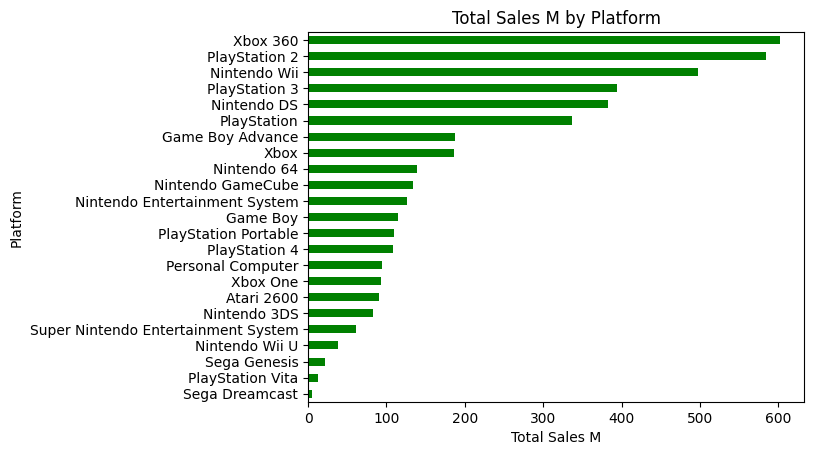

In [103]:
# Bar chart of total sales by platform 

# Ensure NA_Sales is numeric
df['NA_Sales'] = pd.to_numeric(df['NA_Sales'], errors='coerce')

# Group data by 'Platforms_Clean' and sum 'NA_Sales'
platform_sales = df.groupby('Platforms_Clean')['NA_Sales'].sum().sort_values(ascending = True).tail(23)

# Create a bar chart
platform_sales.plot.barh(color = 'green')

# Add labels and title
plt.xlabel('Total Sales M')
plt.ylabel('Platform')
plt.title('Total Sales M by Platform')

# Show the plot
plt.show()

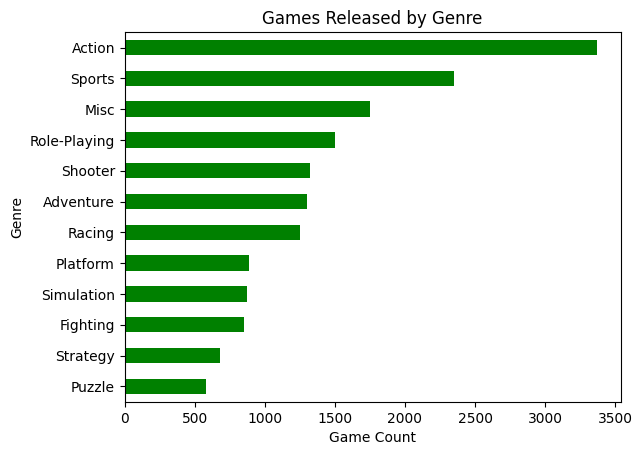

In [110]:
# game count by genre 

# Group by Genre and Count the Platform
games_release = df.groupby('Genre')['Platform'].count().sort_values(ascending = True)

# Create a bar chart
games_release.plot.barh(color = 'green')

# Add labels and title
plt.xlabel('Game Count')
plt.ylabel('Genre')
plt.title('Games Released by Genre')

# Show the plot
plt.show()

In [ ]:
# INSIGHTS